In [1]:
from fu_radar_fut import *

In [2]:
lits_player1, player1 = dados_jogador('brasileirao_2023_links.txt', 'flamengo', 'Gabriel Barbosa')

https://www.sofascore.com/api/v1/event/11067620/shotmap
https://www.sofascore.com/api/v1/event/11067596/shotmap
https://www.sofascore.com/api/v1/event/11067576/shotmap
https://www.sofascore.com/api/v1/event/11067574/shotmap
https://www.sofascore.com/api/v1/event/11779979/shotmap
https://www.sofascore.com/api/v1/event/11067517/shotmap
https://www.sofascore.com/api/v1/event/11067437/shotmap
https://www.sofascore.com/api/v1/event/11067376/shotmap
https://www.sofascore.com/api/v1/event/11067279/shotmap
https://www.sofascore.com/api/v1/event/11067475/shotmap
https://www.sofascore.com/api/v1/event/11067434/shotmap
https://www.sofascore.com/api/v1/event/11067422/shotmap
https://www.sofascore.com/api/v1/event/11067396/shotmap
https://www.sofascore.com/api/v1/event/11067365/shotmap
https://www.sofascore.com/api/v1/event/11067351/shotmap
https://www.sofascore.com/api/v1/event/11067318/shotmap
https://www.sofascore.com/api/v1/event/11067299/shotmap
https://www.sofascore.com/api/v1/event/11067293/

In [3]:
player1

'Gabriel Barbosa'

In [4]:
data_frame_player1 = data_frame_radar(lits_player1)

In [5]:
data_frame_player1

,Gols,Chutes,Chutes ao gol,%Chute ao gol,Cutes/90',Chutes ao Gol/90',Gol/Chute,Gol/Chute ao gol,xg,xgot,Player
0,5,48,18,0.270833,2.526316,0.157895,0.104167,0.277778,9.536612,8.8565,Gabriel Barbosa


In [6]:
lits_player2, player2 = dados_jogador('brasileirao_2023_links.txt', 'são paulo', 'Luciano')

https://www.sofascore.com/api/v1/event/11067620/shotmap
https://www.sofascore.com/api/v1/event/11067606/shotmap
https://www.sofascore.com/api/v1/event/11067592/shotmap
https://www.sofascore.com/api/v1/event/11067560/shotmap
https://www.sofascore.com/api/v1/event/11067392/shotmap
https://www.sofascore.com/api/v1/event/11067531/shotmap
https://www.sofascore.com/api/v1/event/11067452/shotmap
https://www.sofascore.com/api/v1/event/11067295/shotmap
https://www.sofascore.com/api/v1/event/11067503/shotmap
https://www.sofascore.com/api/v1/event/11067464/shotmap
https://www.sofascore.com/api/v1/event/11652579/shotmap
https://www.sofascore.com/api/v1/event/11067420/shotmap
https://www.sofascore.com/api/v1/event/11067391/shotmap
https://www.sofascore.com/api/v1/event/11067371/shotmap
https://www.sofascore.com/api/v1/event/11604482/shotmap
https://www.sofascore.com/api/v1/event/11067347/shotmap
https://www.sofascore.com/api/v1/event/11067332/shotmap
https://www.sofascore.com/api/v1/event/11067292/

In [7]:
data_frame_2 = data_frame_radar(lits_player2)

In [8]:
data_frame_2

,Gols,Chutes,Chutes ao gol,%Chute ao gol,Cutes/90',Chutes ao Gol/90',Gol/Chute,Gol/Chute ao gol,xg,xgot,Player
0,9,75,27,0.24,2.777778,0.111111,0.12,0.333333,9.156046,9.1531,Luciano


In [9]:
df = pd.concat([data_frame_2,data_frame_player1], ignore_index=True)

In [10]:
df

,Gols,Chutes,Chutes ao gol,%Chute ao gol,Cutes/90',Chutes ao Gol/90',Gol/Chute,Gol/Chute ao gol,xg,xgot,Player
0,9,75,27,0.240000,2.777778,0.111111,0.120000,0.333333,9.156046,9.1531,Luciano
1,5,48,18,0.270833,2.526316,0.157895,0.104167,0.277778,9.536612,8.8565,Gabriel Barbosa


In [36]:
params = ['Gols', 'Chutes', 'Chutes ao gol', '%Chute ao gol', 'Cutes/90\'', 'Chutes ao Gol/90\'', 'Gol/Chute', 'Gol/Chute ao gol', 'xg', 'xgot']
maximun = []
minimun = []
for x in params:
    if df[x][0] > df [x][1]:
        maximun.append(df[x][0]*1.05)
        minimun.append(df[x][1]*0.5)
    else:
        minimun.append(df[x][0]*0.5)
        maximun.append(df[x][1]*1.05)

In [37]:
minimun

[2.5,
 24.0,
 9.0,
 0.12,
 1.263157894736842,
 0.05555555555555555,
 0.052083333333333336,
 0.1388888888888889,
 4.578023034671696,
 4.428250000000001]

In [22]:
lista_player1 = []
for x in params:
    lista_player1.append(data_frame_player1[x][0])

In [41]:
lista_player2 = []
for x in params:
    lista_player2.append(data_frame_2[x][0])

In [42]:
lista_player2

[9,
 75,
 27,
 0.24,
 2.7777777777777777,
 0.1111111111111111,
 0.12,
 0.3333333333333333,
 9.156046069343391,
 9.1531]

In [14]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

In [38]:
radar = Radar(params, minimun, maximun,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

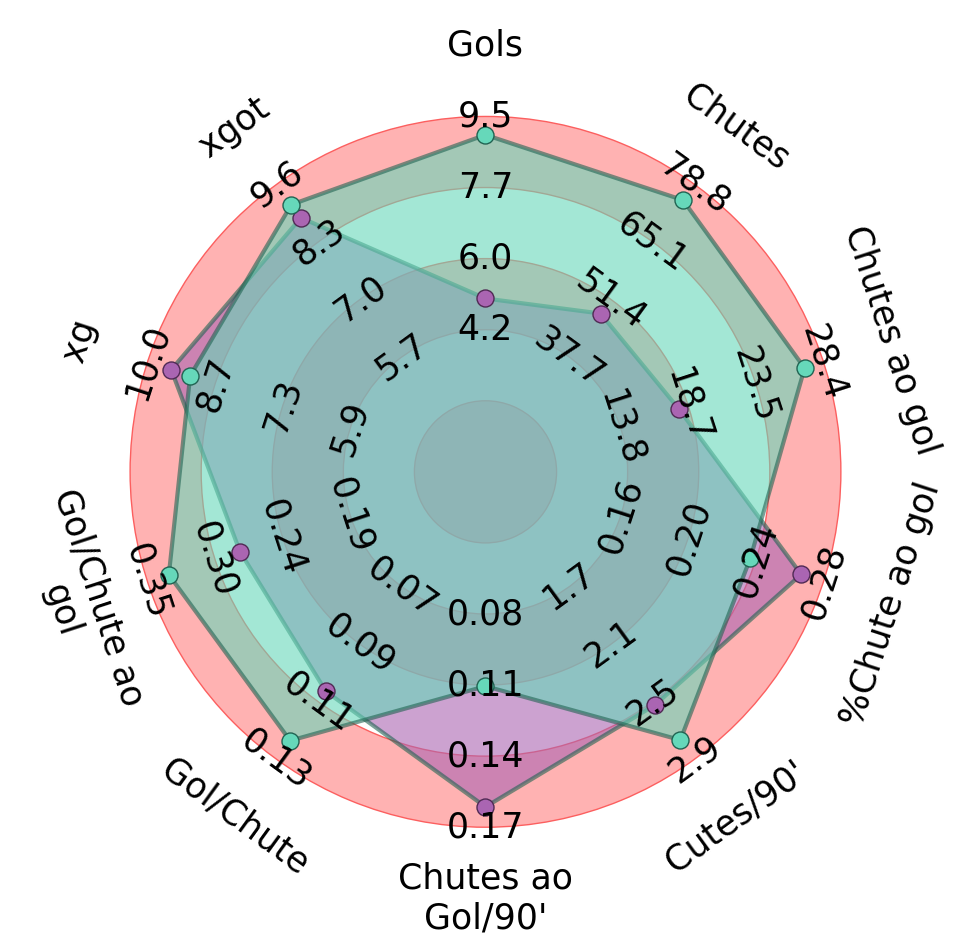

In [43]:
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')

radar1, vertices1 = radar.draw_radar_solid(lista_player1, ax=ax,
                                           kwargs={'facecolor': '#aa65b2',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(lista_player2, ax=ax,
                                           kwargs={'facecolor': '#66d8ba',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})


ax.scatter(vertices1[:, 0], vertices1[:, 1],
           c='#aa65b2', edgecolors='#502a54', marker='o', s=150, zorder=2)
ax.scatter(vertices2[:, 0], vertices2[:, 1],
           c='#66d8ba', edgecolors='#216352', marker='o', s=150, zorder=2)

range_labels = radar.draw_range_labels(ax=ax, fontsize=25)
param_labels = radar.draw_param_labels(ax=ax, fontsize=25)